# SIGMusic Lecture 1: Making Noise

We'll start by importing our first sound, see what exactly we're working with, and export the sound to a new file.

In [29]:
# Scipy saves us the hassle of writing our import/export code by hand.
import scipy.io.wavfile as wav

# scipy.io.wavfile.read takes in a path pointing to our sound file, and returns a "sample rate" integer as well as our sound.
sample_rate, sound = wav.read('first_sound.wav')

Sound is broken up into tens of thousands of "samples" which are discrete values. When enough of these fast enough, they appear to be a continuous sound to our ears.

In [30]:
# How many samples are being played every second?
print(f'Sample Rate: {sample_rate}') 

Sample Rate: 11025


Sounds, in turn, are represented by 2D arrays of samples. The first axis represents time in terms of samples- precisely how many of them have gone by.

The second axis is represents our "channels." Each channel is a unique speaker outputting it's own line of samples. Typically, you'll listen to "stereophonic" sounds, AKA two channels, (one for your left ear, one for your right ear.) Another common setup is "monophonic" or one speaker. Depending on your sound setup, you might even run more speakers- professional setups sometimes have six or eight speakers. The Tryon Festival Theatre in KCPA has a 128-channel speaker system >:O  

In [31]:
# What's the structure of our sound?
print(f'Sound shape: {sound.shape}')

Sound shape: (28884,)


Once we have our sound, we can view the data in two ways. First, we can export our sound as a new file and play it. This is particularly important if you've made edits to the original sound.


In [32]:
wav.write('exported_sound.wav', sample_rate, sound)

... which is fine, but wouldn't we rather listen to our newly-exported sound as we write our code?

Jupyter Notebook: "Did somebody say *inline*?"

In [33]:
import IPython

IPython.display.Audio(sound, rate=sample_rate)

Second, we can print the array of values.

In [34]:
print(sound)
# or 
import numpy as np
np.savetxt('sound_array.txt', sound)

[ 297  667 5336 ...   16   26   10]


... which is also fine, but we'd rather "visualize" our sound to see what's going on. Matplotlib to the rescue!

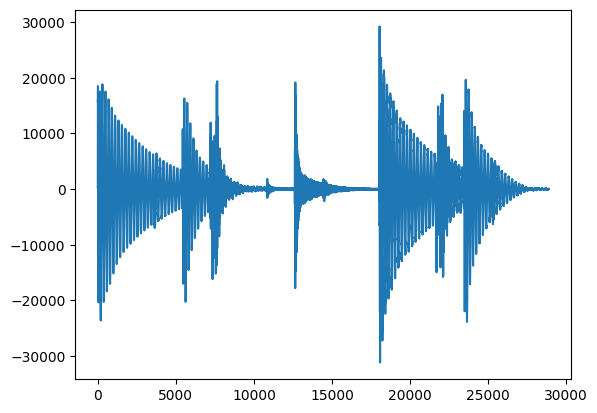

In [35]:
import matplotlib.pyplot as plt

plt.plot(sound)

That's better! Now we can see what's going on in the sound. Remember: the x-axis is time in samples, and the y-axis is sampling value or "intensity."

Even with this small amount of knowledge, we can do a lot of basic music production!

Let's go back to our sound: maybe I like the synth "whrrr whrr" in the middle, but I don't want the rest of the sound. Since we're dealing with an array, we can use Python's *list indexing* funcitonality as a clipping tool!

In [36]:
clip = sound[11000:22000, :]

IPython.display.Audio(clip, rate=sample_rate)

We can also do some rudimentary speed-up and slow-down! Just change the sample rate :)

In [37]:
IPython.display.Audio(sound, rate=sample_rate - 800)

In [38]:
IPython.display.Audio(sound, rate=sample_rate + 800)

Okay, so we can already do some cool stuff with existing sound. But what about making our *own* sounds?

First, we define our sample array. I like using `np.linspace` to build the array, then edit that.

Second, we define our sound: `s = a * sin(f * 2pi * t)`, 
where `a` is the sound's *amplitude*, `t` is a sample in time, and `f` is the frequency of our sound in Hertz.

WARNING: these basic sounds will be **VERY LOUD**, so remember to set `normalize=False`, use a low amplitude `a < 0.3`, and turn your volume down initially. You can always increase the volume incrementally.

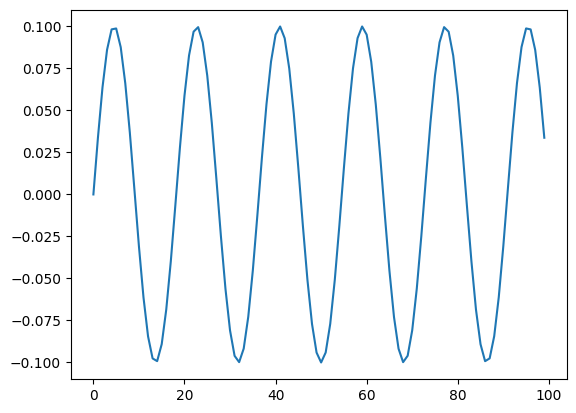

In [42]:
sample_rate = 8000 # how many samples to play per second
duration = 3 # time, in seconds
t = np.linspace(0, duration, num=int(sample_rate * duration))

freq = 440
s = 0.1 * np.sin(freq * 2 * np.pi * t)

IPython.display.Audio(s, rate=sample_rate, normalize=False)
plt.plot(s[0:100])

What about multiple sounds?

Remember: Adding sounds increases the overall *volume* of the sound, so it's best to define an amplitude maximum and "distribute" the amplitude among your individual sinusoids.

In [43]:
f1 = 440
s1 = 0.05 * np.sin(f1 * 2 * np.pi * t)

f2 = 277.183 * 2
s2 = 0.05 * np.sin(f2 * 2 * np.pi * t)

s_chord = s1 + s2
IPython.display.Audio(s_chord, rate=sample_rate, normalize=False)

In [44]:
f3 = 329.628 * 2
s3 = 0.05 * np.sin(f3 * 2 * np.pi * t)

s_chord += s3
IPython.display.Audio(s_chord, rate=sample_rate, normalize=False)

What else can we do to our sound?

In [ ]:
# Addendum A:
# Scipy isn't the only library you can use to import sound.
import soundfile as sf

sound, sample_rate = sf.read('first_sound.wav')
print(f'SR: {sample_rate}, Sound: {sound.shape}')

In [52]:
c: int = 0.5

f1 = 440 * c
s1 = 0.1/4 * np.sin(f1 * 2 * np.pi * t)

f2 = 277.183 * 2 * c
s2 = 0.1/4 * np.sin(f2 * 2 * np.pi * t)

f3 = 329.628 * 2 * c
s3 = 0.1/4 * np.sin(f2 * 2 * np.pi * t)

f4 =  440 * 2 * c
s4 = 0.1/4 * np.sin(f2 * 2 * np.pi * t)

s_chord = s1 + s2 + s3 + s4
IPython.display.Audio(s_chord, rate=sample_rate, normalize=False)

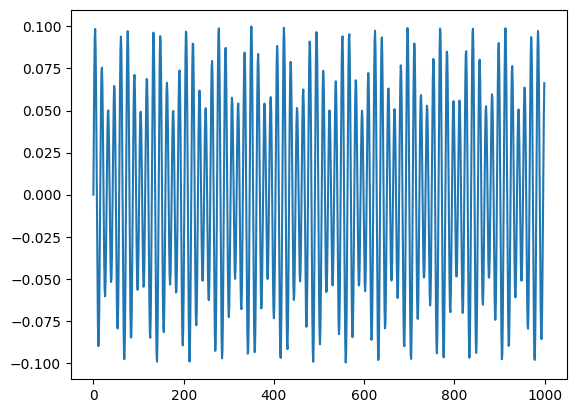

In [51]:
plt.plot(s_chord[0:1000])